In [25]:
import os
import shutil

def sample_images(source_dir, dest_dir, num_samples=550):
    # Create destination directory if it doesn't exist
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # List all folders in the source directory
    for folder in os.listdir(source_dir):
        # Construct the path for the current folder
        folder_path = os.path.join(source_dir, folder)
        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Create a new directory in the destination folder
            dest_folder_path = os.path.join(dest_dir, folder)
            os.makedirs(dest_folder_path)
            # List all files in the current folder
            files = os.listdir(folder_path)
            # Shuffle the files
            # Copy the first 'num_samples' files to the destination folder
            for i in range(min(num_samples, len(files))):
                shutil.copy(os.path.join(folder_path, files[i]), dest_folder_path)

# Navigate to the directory containing 'N' and 'NF' folders
directory_path = 'C:/Users/pgajjar/Downloads/NNF'
os.chdir(directory_path)

# Create 'NN' and 'NNF' folders and sample images
sample_images('N', 'NN')
sample_images('NF', 'NNF')


In [35]:
sample_images('D', 'ND')

In [32]:
import os
import numpy as np
from PIL import Image

def load_data(directory, target_size=(128, 128)):
    # Initialize lists to store images and labels
    images = []
    labels = []
    
    # Create a dictionary to map class names to numerical labels
    class_to_label = {}
    class_folders = sorted(os.listdir(directory))
    for i, class_folder in enumerate(class_folders):
        class_to_label[class_folder] = i

    # Iterate through each subdirectory (class)
    for class_folder in class_folders:
        class_folder_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_folder_path):
            # Load images from the current class folder
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                if os.path.isfile(image_path):
                    # Open image using PIL
                    image = Image.open(image_path).convert('RGB')
                    # Resize image
                    image = image.resize(target_size)
                    # Convert image to numpy array
                    image_np = np.array(image)
                    # Append image to the list of images
                    images.append(image_np)
                    # Append numerical label to the list of labels
                    labels.append(class_to_label[class_folder])

    return np.array(images), np.array(labels)

# Specify the directory containing class subfolders
directory = 'C:/Users/pgajjar/Downloads/NNF/NN'

# Load images and labels
x, y = load_data(directory)

print(x.shape)
print(y.shape)
# Save numpy arrays
np.save('C:/Users/pgajjar/Downloads/NNF/NN/resized_images.npy', x)
np.save('C:/Users/pgajjar/Downloads/NNF/NN/labels.npy', y)


(2750, 128, 128, 3)
(2750,)


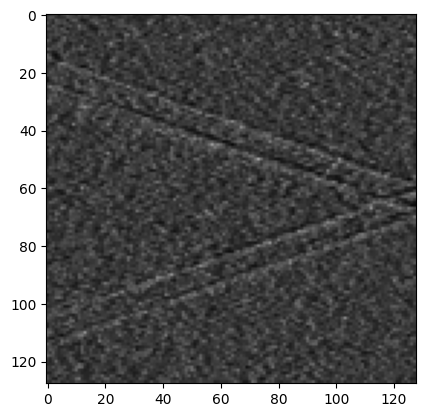

In [33]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [34]:
directory = 'C:/Users/pgajjar/Downloads/NNF/NNF'

# Load images and labels
x, y = load_data(directory)

print(x.shape)
print(y.shape)
# Save numpy arrays
np.save('C:/Users/pgajjar/Downloads/NNF/NNF/resized_images.npy', x)
np.save('C:/Users/pgajjar/Downloads/NNF/NNF/labels.npy', y)


(2750, 128, 128, 3)
(2750,)


In [37]:
directory = 'C:/Users/pgajjar/Downloads/NNF/ND'

# Load images and labels
x, y = load_data(directory)

print(x.shape)
print(y.shape)
# Save numpy arrays
np.save('C:/Users/pgajjar/Downloads/NNF/ND/resized_images.npy', x)
np.save('C:/Users/pgajjar/Downloads/NNF/ND/labels.npy', y)

(2750, 128, 128, 3)
(2750,)
